In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN

In [3]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [4]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [5]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [6]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [7]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [8]:
X = preprocessing.normalize(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_train[:3]

array([[0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.57735027,
        0.28867513, 0.28867513, 0.28867513, 0.28867513],
       [0.38949042, 0.44513191, 0.38949042, 0.11128298, 0.22256595,
        0.44513191, 0.16692447, 0.44513191, 0.11128298],
       [0.62554324, 0.20851441, 0.20851441, 0.20851441, 0.41702883,
        0.20851441, 0.41702883, 0.20851441, 0.20851441]])

In [11]:
X.shape, y.shape

((683, 9), (683, 2))

In [12]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

         Current function value: 26.000059
         Iterations: 55
         Function evaluations: 82
         Gradient evaluations: 71


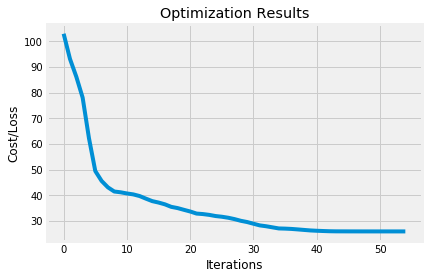

In [13]:
N.plot_cost()

In [14]:
N.compute_accuracy(X_test, y_test)

0.8716814159292036

In [15]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)

         Current function value: 25.000171
         Iterations: 91
         Function evaluations: 143
         Gradient evaluations: 130


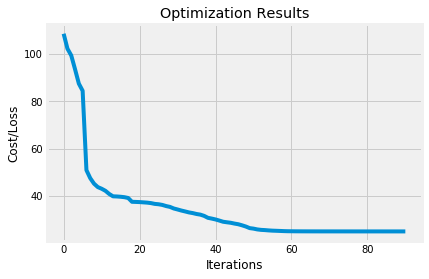

In [16]:
N2.plot_cost()

In [17]:
N2.compute_accuracy(X_test, y_test)

0.8805309734513275